In [1]:
from pathways.scenarios import run_scenarios, load_scenario_table
from pathways.simulation import load_configuration
from pathways.outputs import save_scenario_result_to_pandas

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [146]:
from pathlib import Path
datadir = Path("tests/test_summaries")
basic_config = load_configuration(datadir / "config.yml")
scenario_table = load_scenario_table(datadir / "validation_scenarios.csv")

In [147]:
num_shipments = 20
results, scenario_details = run_scenarios(
    config=basic_config,
    scenario_table=scenario_table,
    seed=42,
    num_simulations=1,
    num_shipments=num_shipments,
    detailed=True,
)

clustered_10
clustered_12


In [148]:
df = save_scenario_result_to_pandas(
    results,
    config_columns=[
        "name",
        "shipment_name",
        "inspection_name",
        "shipment/boxes/min",
        "shipment/boxes/max",
        "shipment/stems_per_box/default",
        "pest/infestation_unit",
        "pest/infestation_rate/parameters",
        "pest/arrangement",
        "pest/clustered/distribution",
        "inspection/unit",
        "inspection/sample_strategy",
        "inspection/proportion/value",
        "inspection/hypergeometric/detection_level",
        "inspection/selection_strategy",
        "inspection/within_box_pct",
        "inspection/hierarchical/outer",
    ],
    result_columns=[
        "missing",
        "true_infestation_rate",
        "max_missed_infestation_rate",
        "avg_missed_infestation_rate",
        "max_intercepted_infestation_rate",
        "avg_intercepted_infestation_rate",
        "avg_boxes_opened_completion",
        "avg_boxes_opened_detection",
        "avg_stems_inspected_completion",
        "avg_stems_inspected_detection",
        "pct_pest_unreported_if_detection",
    ],
)

In [149]:
#df = pd.read_csv("H:/Shared drives/APHIS  Projects/Pathways/Results/results_all.csv")

In [150]:
len(scenario_details)

2

In [151]:
scenario_stems = [i[0] for i in scenario_details]
scenario_inspected_indexes = [i[1] for i in scenario_details]
stems = np.stack(scenario_stems[0])
len(stems)

200

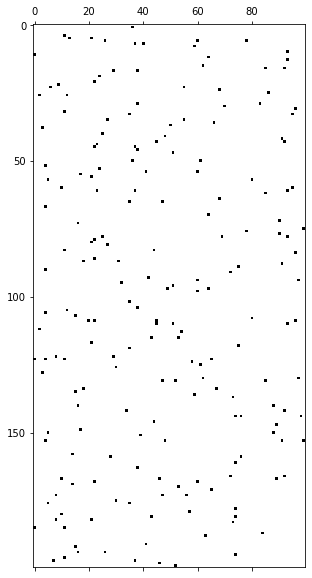

In [152]:
fig, ax = plt.subplots(figsize=(10,10))
#plt.axis('off')
ax.matshow(stems, cmap='Greys')

In [153]:
stems_by_shipment = np.vsplit(stems, num_shipments)


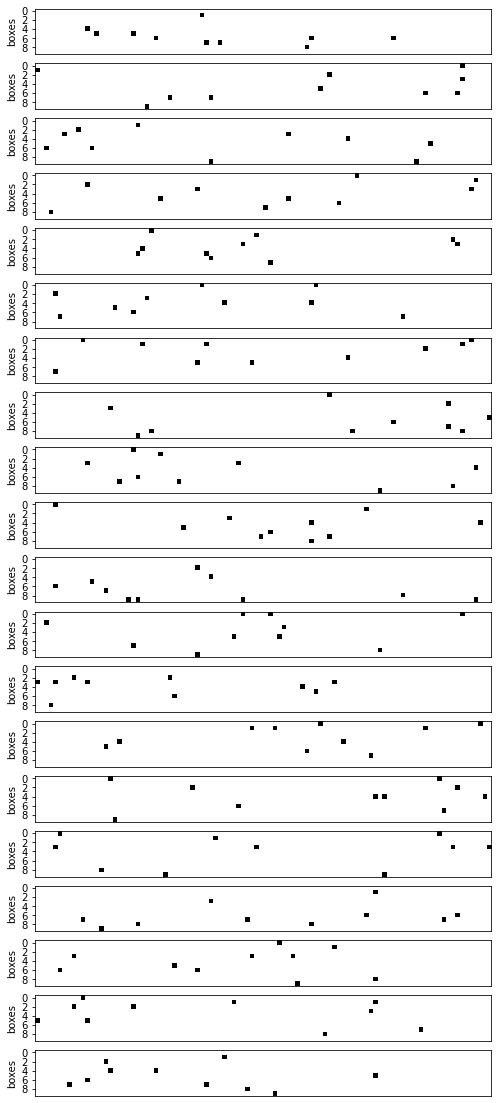

In [154]:
fig, axs = plt.subplots(len(stems_by_shipment), figsize=(25,20))

for i in range(len(stems_by_shipment)):
    axs[i].matshow(stems_by_shipment[i], cmap='Greys')
    axs[i].set_ylabel('boxes')
    axs[i].tick_params(labeltop=False, top=False, bottom=False)


In [142]:
len(scenario_inspected_indexes[0])

20

In [129]:
df['shipment_name'] = pd.Categorical(df['shipment_name'])
shipment_order = ["infestation_5", "infestation_10", "infestation_25", "small", "large", "maritime", "clustered", "clustered_small", "clustered_large"]
df['shipment_name'] = df['shipment_name'].cat.reorder_categories(shipment_order, ordered=True)
df

ValueError: items in new_categories are not the same as in old categories

In [ ]:
df.plot(kind="bar", x="inspection_name", y="missing")

In [ ]:
#df["shipment"] = df.apply(lambda row: re.sub("_[0-9]+$", "", row["name"]), axis = 1)

In [ ]:
df.groupby("shipment_name").agg({"missing": "mean"}).reset_index().plot(kind="bar", x="shipment_name", y="missing")

In [ ]:
df.groupby("inspection_name").agg({"missing": "mean"}).reset_index().plot(kind="bar", x="inspection_name", y="missing")
plt.xlabel("inspection", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Avg percent infested shipments missed by inspection", size=16)

In [ ]:
inspections_vs_shipments = df.pivot_table(index=["inspection_name"], columns=["shipment_name"], values=["missing"])
inspections_vs_shipments

In [ ]:
inspections_vs_shipments.plot(kind="bar")

In [ ]:
ax = inspections_vs_shipments.plot(kind="bar", figsize=(100, 10))
#ax.figure.savefig("inspections_vs_shipments_bar.png")

In [ ]:
from itertools import cycle, islice

it = cycle(list(range(1,49)))
df['inspection_num'] = list(islice(it, len(df)))

In [ ]:
plt.figure(figsize=(30, 8))
sns.boxplot(x="inspection_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("inspection", size=16)
plt.ylabel("percent missed", size=16)
plt.title("Avg. percent infested shipments missed by inspection", size=20)
plt.savefig("missed_by_inspection_boxplot.png", bbox_inches = "tight")

In [ ]:
plt.figure(figsize=(30, 8))
sns.barplot(x="inspection_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("inspection", size=16)
plt.ylabel("percent missed", size=16)
plt.title("Avg. percent infested shipments missed by inspection", size=20)
plt.savefig("missed_by_inspection.png", bbox_inches = "tight")

In [ ]:
sns.barplot(x="shipment_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("shipment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Avg. percent infested shipments missed by shipment type", size=16)
plt.savefig("missed_by_shipment.png", bbox_inches = "tight")

In [ ]:
sns.boxplot(x="shipment_name", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("shipment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent infested shipments missed by shipment type", size=16)
plt.savefig("missed_by_inspection_boxplot.png", bbox_inches = "tight")

In [ ]:
sns.catplot(x="shipment_name", y="missing", hue="inspection/sample_strategy", kind="box", data=df, height=8.27, aspect=11.7/8.27)
plt.xlabel("shipment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent infested shipments missed by shipment type and sample strategy", size=16)
plt.savefig("missed_by_shipment_sample_strategy.png", bbox_inches = "tight")

In [ ]:
sns.catplot(x="shipment_name", y="missing", hue="inspection/unit", kind="box", data=df, height=9, aspect=11.7/8.27)
plt.xlabel("shipment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent infested shipments missed by shipment type and inspection unit", size=16)
plt.savefig("missed_by_shipment_unit.png", bbox_inches = "tight")

In [ ]:
chart = sns.catplot(x="shipment_name", y="missing", hue="inspection/selection_strategy", aspect=11.7/8.27,
            kind="box", data=df, height=8)
chart.set_xticklabels(rotation=65, horizontalalignment='right')
plt.xlabel("shipment type", size=12)
plt.ylabel("percent missed", size=12)
plt.title("Percent infested shipments missed by shipment type and selection strategy", size=16)
chart.savefig("missed_by_shipment_selection.png", bbox_inches = "tight")

In [ ]:
inspections_vs_shipments

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_shipments, annot=True, fmt=".2f", xticklabels = shipment_order)
plt.xlabel("shipment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Percent infested shipments missed", size=16)
plt.savefig("heatmap_missed.png", bbox_inches = "tight")

In [ ]:
inspections_vs_shipments_boxes_opened = df.pivot_table(index=["inspection_name"], columns=["shipment_name"], values=["avg_boxes_opened_completion"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_shipments_boxes_opened, annot=True, fmt=".2f", xticklabels = shipment_order)
plt.xlabel("shipment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of boxes opened (inspect to completion)", size=16)
plt.savefig("heatmap_boxes_completion.png", bbox_inches = "tight")

In [ ]:
inspections_vs_shipments_stems_inspected = df.pivot_table(index=["inspection_name"], columns=["shipment_name"], values=["avg_stems_inspected_completion"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_shipments_stems_inspected, annot=True, fmt=".2f", xticklabels = shipment_order)
plt.xlabel("shipment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of stems inpected (inspect to completion)", size=16)
plt.savefig("heatmap_stems_completion.png", bbox_inches = "tight")

In [ ]:
inspections_vs_shipments_boxes_opened_detection = df.pivot_table(index=["inspection_name"], columns=["shipment_name"], values=["avg_boxes_opened_detection"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_shipments_boxes_opened_detection, annot=True, fmt=".2f", xticklabels = shipment_order)
plt.xlabel("shipment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of boxes opened (inspect to detection)", size=16)
plt.savefig("heatmap_boxes_detection.png", bbox_inches = "tight")

In [ ]:
inspections_vs_shipments_stems_inspected_detection = df.pivot_table(index=["inspection_name"], columns=["shipment_name"], values=["avg_stems_inspected_detection"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_shipments_stems_inspected_detection, annot=True, fmt=".2f", xticklabels = shipment_order)
plt.xlabel("shipment type", size=12)
plt.ylabel("inspection", size=12)
plt.title("Avg. number of stems inspected (inspect to detection)", size=16)
plt.savefig("heatmap_stems_detection.png", bbox_inches = "tight")

In [ ]:
df_norm = df[["missing",
        "true_infestation_rate",
        "max_intercepted_infestation_rate",
        "avg_intercepted_infestation_rate",
        "avg_boxes_opened_completion",
        "avg_boxes_opened_detection",
        "avg_stems_inspected_completion",
        "avg_stems_inspected_detection",
        "pct_sample_if_to_detection",
        "pct_pest_unreported_if_detection"]]
df_norm

In [ ]:
df_norm=(df_norm-df_norm.min())/(df_norm.max()-df_norm.min())
df_norm

In [ ]:
df_norm["name"], df_norm["inspection_num"], df_norm["inspection_name"], df_norm["shipment_name"] = df["name"], df["inspection_num"], df["inspection_name"], df["shipment_name"]
df_norm

In [ ]:
df_norm_melted = pd.melt(df_norm, id_vars=["inspection_num", "inspection_name", "shipment_name"], value_vars=["missing", "avg_boxes_opened_completion", "avg_stems_inspected_completion"])
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted, ax=ax1, ci = None)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (mean value across all shipment types)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_all.png", bbox_inches = "tight")

In [ ]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.shipment_name.eq("infestation_5")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (5% Infestation shipments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_infestation_5.png", bbox_inches = "tight")

In [ ]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.shipment_name.eq("infestation_10")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (10% Infestation shipments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_infestation_10.png", bbox_inches = "tight")

In [ ]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.shipment_name.eq("infestation_25")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (25% Infestation shipments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_infestation_25.png", bbox_inches = "tight")

In [ ]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.shipment_name.eq("small")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Small shipments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_small.png", bbox_inches = "tight")

In [ ]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.shipment_name.eq("large")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Large shipments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_large.png", bbox_inches = "tight")

In [ ]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.shipment_name.eq("maritime")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Maritime shipments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_maritime.png", bbox_inches = "tight")

In [ ]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.shipment_name.eq("clustered")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Clustered shipments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_clustered.png", bbox_inches = "tight")

In [ ]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.shipment_name.eq("clustered_small")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Clustered small shipments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_clustered_small.png", bbox_inches = "tight")

In [ ]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_name", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.shipment_name.eq("clustered_large")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Normalized metrics by inspection (Clustered large shipments)")
plt.xlabel("inspection description")
plt.ylabel("normalized value")
plt.savefig("metrics_by_inspection_clustered_large.png", bbox_inches = "tight")